---
## **Exploratory Data Analysis: Gala Group**

### **@author: Shwetank Goswami**

### **GitHub: cipher499**

#### date: 21/07/23


---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset into a dataframe
df = pd.read_csv('sample_sales_data.csv')
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [3]:
# drop the first column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# descriptive statistics of numerical features
df[['unit_price', 'quantity', 'total']].describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [5]:
# check data types of all columns
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [6]:
# check for null values
df.isnull().value_counts()

transaction_id  timestamp  product_id  category  customer_type  unit_price  quantity  total  payment_type
False           False      False       False     False          False       False     False  False           7829
dtype: int64

<AxesSubplot:>

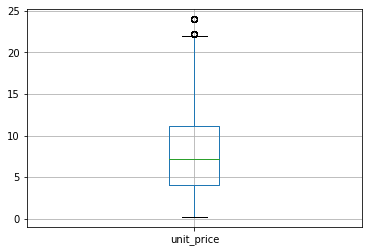

In [7]:
# Visualize numerical columns
df.boxplot(column = 'unit_price')

<AxesSubplot:>

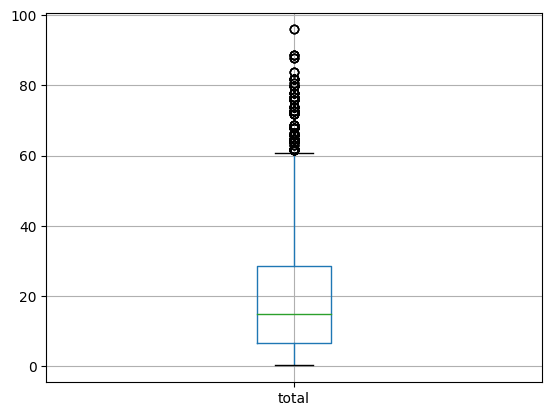

In [8]:
df.boxplot(column = 'total')

In [9]:
df.columns

Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [10]:
# functions to plot the different types of columns

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    cont_plot = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
    num_unique_values = len(data[column].unique())
    value_counts = data[column].value_counts()
    print(f"Column: {column} has {num_unique_values} unique values\n")
    print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    cat_plot = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');
    plt.title(f'Distribution of {column}')
    # Rotate the x-axis tick labels
    cat_plot.set_xticklabels(rotation=90)
    plt.show()

def correlation_plot(data: pd.DataFrame = None):
    corr = data.corr()
    corr_styled = corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True))
    plt.show()
    return corr_styled

In [11]:
# correlation betweeen numerical columns
correlation_plot(df[['unit_price', 'total', 'quantity']])

,unit_price,total,quantity
unit_price,1.000000,0.792018,0.024588
total,0.792018,1.000000,0.521926
quantity,0.024588,0.521926,1.000000


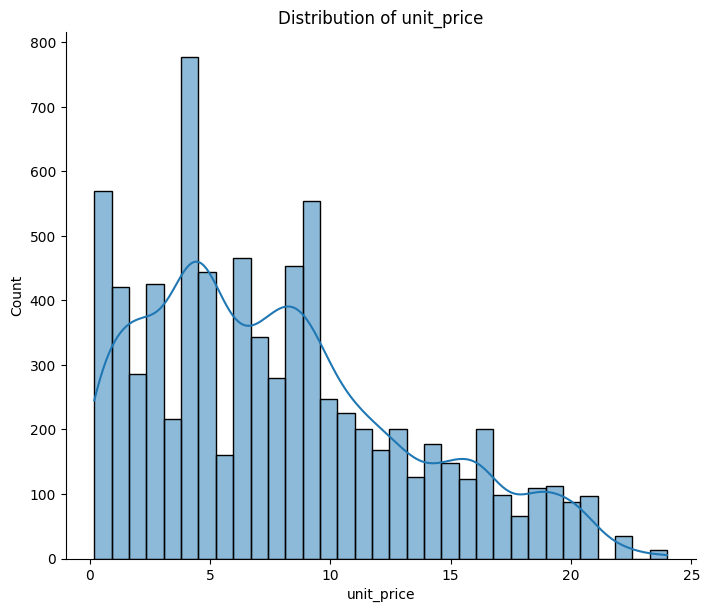

In [12]:
# visualize continuous variables
plot_continuous_distribution(df, 'unit_price', 6)

* **It is evident that the items that are priced high sell less which makes sense as in a grocery story, cheaper items are expected to be sold more.**

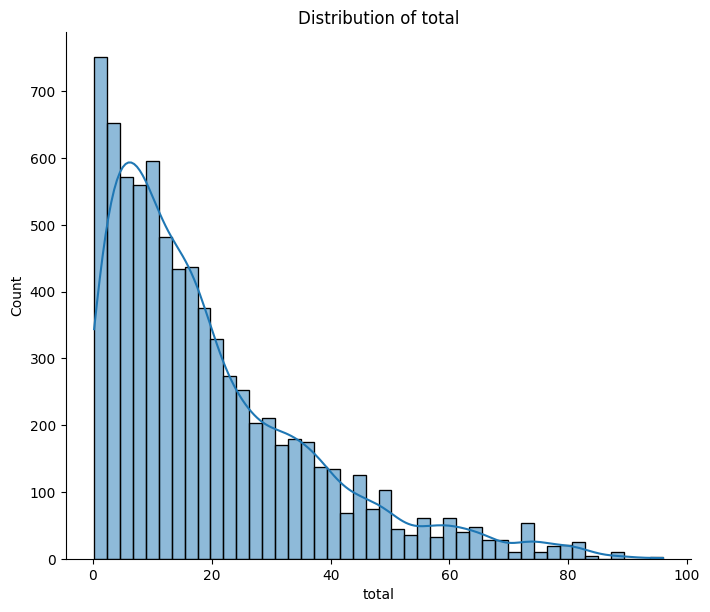

In [13]:
# visualize total sales
plot_continuous_distribution(df, 'total', 6)

* **Smaller purchases seem to be more frequent. The customers tend to make small purchases often and occasional high value transactions.**

In [14]:
# number & countof products
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


* **A total of 300 different types of products are in the dataset. The product `ecac012c-1dec-41d4-9ebd-56fb7166f6d9` is the most sold item.**

In [15]:
# number & count of customer types 
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


* **Non-members constitute the group that has made the most purchases. Amongst the members, there is not much difference.**

In [16]:
# number & count of payment types
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


* **We can see that most customers make cash transactions.**

In [17]:
# number & count of categories
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


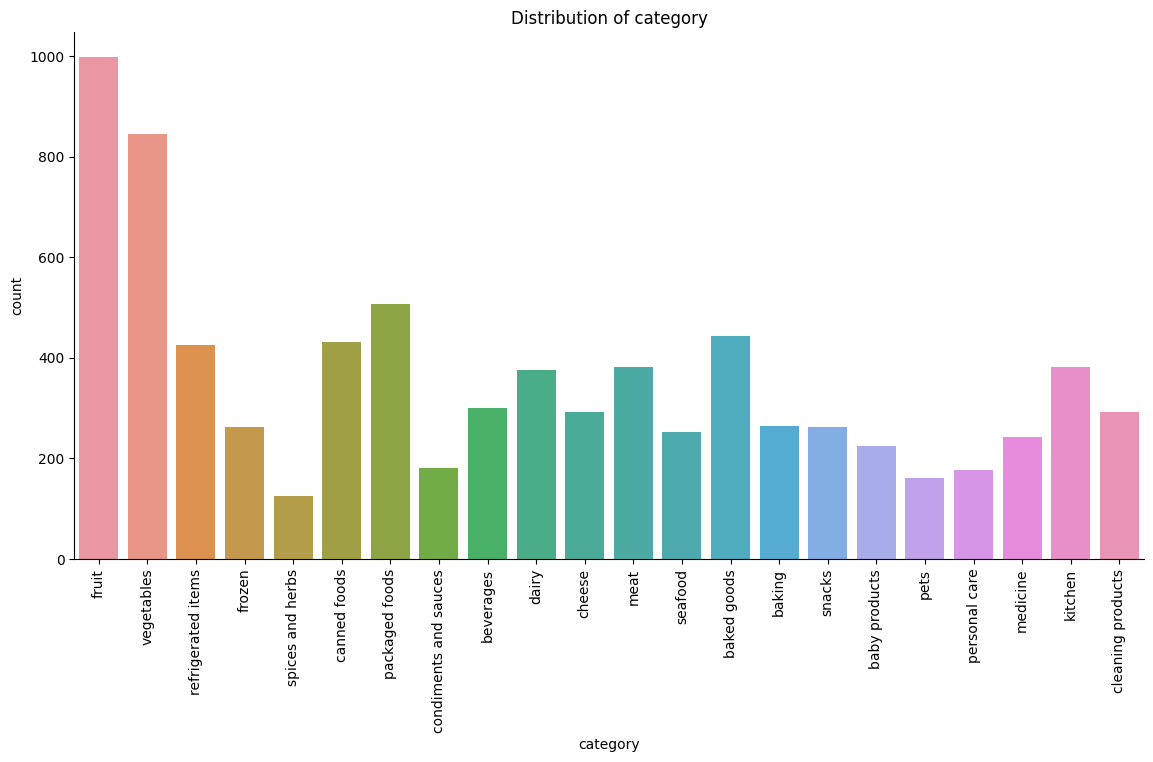

In [18]:
# visualize item categories by count
plot_categorical_distribution(df, 'category', 6)

* **The items in the dataset are categorized into 22 unique categories, and `fruit`, `vegetables`, & `packaged food` are the most sold categories. This indicates that customers buy food items on a regular basis.**

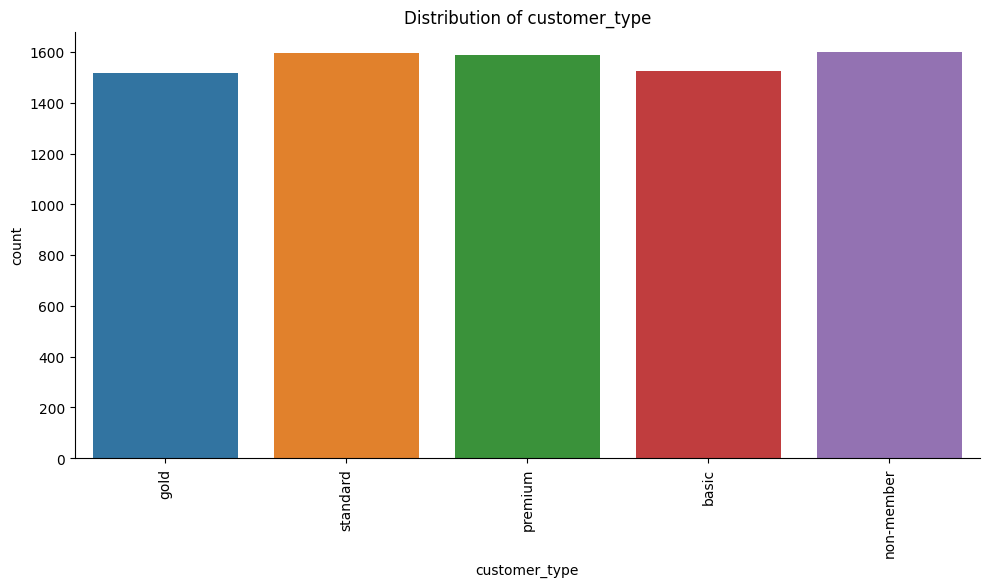

In [19]:
# visualize customer types by count
plot_categorical_distribution(df, 'customer_type', 5)

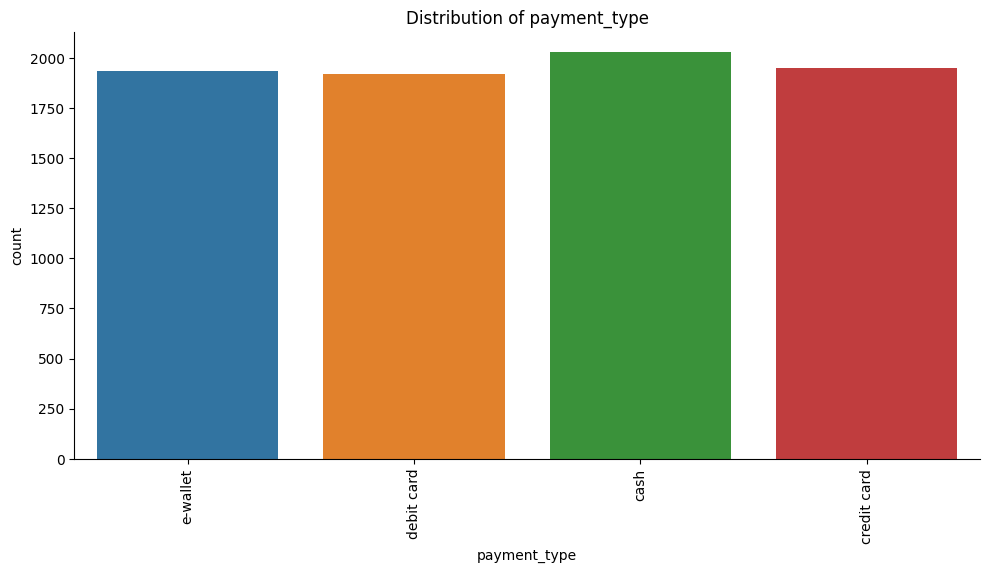

In [20]:
# visualize payment types by count
plot_categorical_distribution(df, 'payment_type', 5)

In [21]:
# pivot table of categories and the total revenue they generated
df_catrev = pd.pivot_table(df, index = 'category', values = 'total', aggfunc = 'sum').sort_values('total', ascending=False)
df_catrev

,total
category,
kitchen,14456.65
meat,14102.31
seafood,10754.81
medicine,10393.78
beverages,9930.64
cleaning products,9483.75
baked goods,8348.21
dairy,7551.60
refrigerated items,7436.45


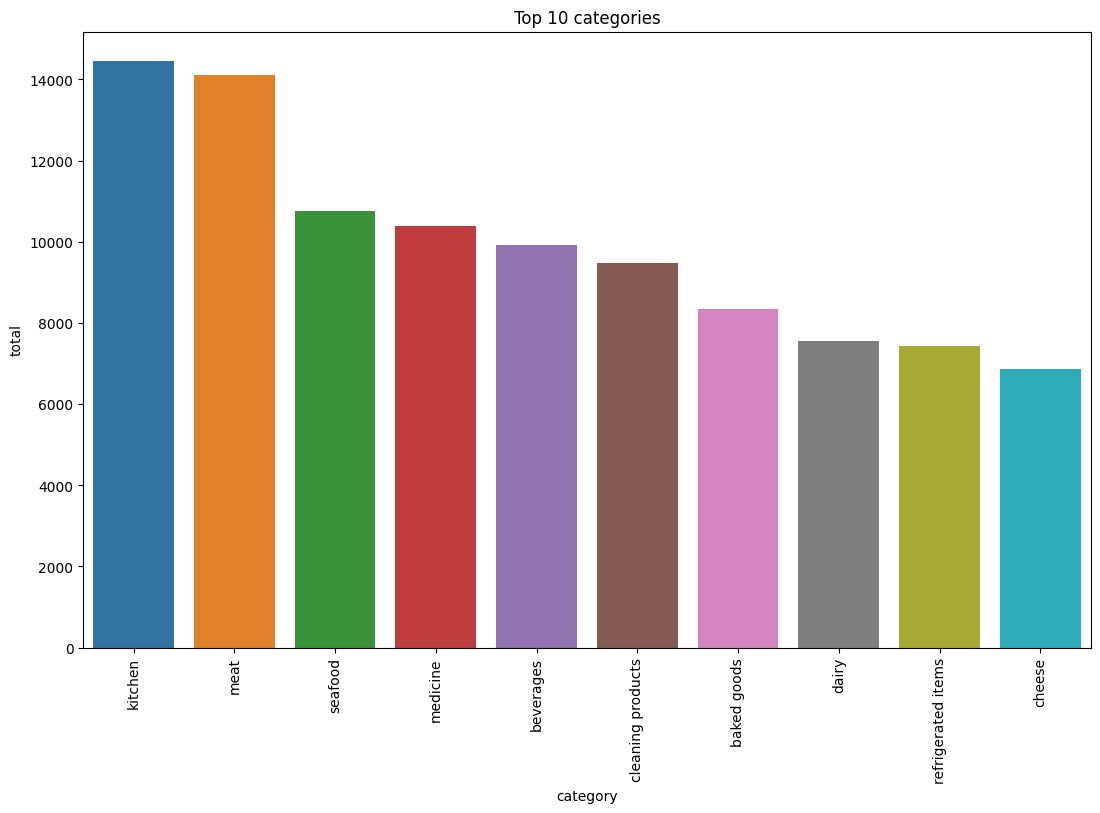

In [22]:
# plot the top 10 categories by revenue
plt.figure(figsize=(13, 8))
cat_rev = sns.barplot(x = df_catrev.index[:10], y = df_catrev['total'][:10])
cat_rev.set_xticklabels(cat_rev.get_xticklabels(), rotation = 90)
plt.title('Top 10 categories')
plt.show()

* **Items belonging to the categories `kitchen`, `meat`, & `seafood` are bringing in the most revenue. 8 out of the top 10 categories are food items, the other two being `medicine` and `cleaning products`. This means that food items, particularly packaged items, need to be more frequently restocked. Vegetables, fruits, and other non packaged items that are bought from local suppliers may require better inventory management and closer monitoring of their availability to ensure a steady supply to meet customer demand.**

In [23]:
# function convert the timestamp column into the datetime format

def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [24]:
df = convert_to_datetime(df, 'timestamp')

In [25]:
df.dtypes

transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object

*The timestamp column is converted into the datetime datatype.*

In [26]:
df['hour'] = df['timestamp'].dt.hour
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [27]:
df['hour'].value_counts()

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64

* **The hours 11 & 16 are the busiest throughout the day. This could mean that customers make transactions while commuting during their lunch breaks, as well as at the end of the workday.**

___

The clients want to know:
    `How to better stock the items so they sell?`

* We need more features. The current set of features did not provide enough information to answer this question.
* We need more rows of data. This dataset contained only one week's data which is not enough to understand the general trends.
* The question needs to be reformulated or fragmented into specific problems that we can tackle. The given question is too vague to answer with the analysis of their data.